# Loading Data + Checking Distributions




In [ ]:
!unzip ./archive.zip

Streaming output truncated to the last 5000 lines.
  inflating: tomato/train/Tomato___Target_Spot/002213fb-b620-4593-b9ac-6a6cc119b100___Com.G_TgS_FL 8360.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0044d10f-7062-4655-8abd-9fffc5b2f152___Com.G_TgS_FL 7908.JPG  
  inflating: tomato/train/Tomato___Target_Spot/00854623-ba28-446d-a1d5-03c0ae3f99d9___Com.G_TgS_FL 7949.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118c27a-f34a-41e1-8b2f-d2c564f83c5c___Com.G_TgS_FL 0013.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0118ed61-b135-45be-ad81-7e2d54203be4___Com.G_TgS_FL 8241.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0197df47-a9cb-4b6c-b72c-ac0e9af6d135___Com.G_TgS_FL 0779.JPG  
  inflating: tomato/train/Tomato___Target_Spot/025510ac-15db-4861-b02b-21da82161100___Com.G_TgS_FL 0952.JPG  
  inflating: tomato/train/Tomato___Target_Spot/0288164e-d6cf-4215-b593-7b581308a4cf___Com.G_TgS_FL 9777.JPG  
  inflating: tomato/train/Tomato___Target_Spot/03002b91-afe3-4c72-86b

In [ ]:
data_dir = './tomato/'

In [ ]:
data_dir

'./tomato/'

In [ ]:
from PIL import Image
import hashlib
import os
data_dir = './tomato/'

def get_md5_hash(file_path):
    with open(file_path, 'rb') as f:
        return hashlib.md5(f.read()).hexdigest()

def remove_duplicates(directory):
    md5_hashes = set()
    duplicates = []
    for subdir, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(subdir, file)
            md5_hash = get_md5_hash(file_path)
            if md5_hash in md5_hashes:
                duplicates.append(file_path)
                os.remove(file_path)
            else:
                md5_hashes.add(md5_hash)
    return duplicates

removed_files = remove_duplicates(data_dir)
if removed_files:
    print("Removed the following duplicate images:")
    for file_path in removed_files:
        print(file_path)
else:
    print("No duplicate images found.")


Removed the following duplicate images:
./tomato/val/Tomato___Early_blight/Tomato___Early_blight_original_1c31e2e3-e314-47a8-86fe-e7b8b9199c09___RS_Erly.B 8272.JPG_fb13e01c-da29-4b10-a111-48626341789b.JPG
./tomato/val/Tomato___Early_blight/Tomato___Early_blight_original_0e2e58b7-1417-49c4-b014-b5efb4b4b831___RS_Erly.B 8256.JPG_6566a3c2-ca2e-42bf-9b17-1f112dd92f4f.JPG
./tomato/val/Tomato___Early_blight/Tomato___Early_blight_original_0b494c44-8cd0-4491-bdfd-8a354209c3ae___RS_Erly.B 9561.JPG_88d1352d-7d36-43c9-9c2f-bbee88909174.JPG
./tomato/val/Tomato___Early_blight/Tomato___Early_blight_original_0f7a2408-9c26-4ff9-bee5-2bfcd91a11f7___RS_Erly.B 9440.JPG_b02a368f-caff-410e-846b-d5966766856a.JPG
./tomato/val/Tomato___Early_blight/Tomato___Early_blight_original_0b494c44-8cd0-4491-bdfd-8a354209c3ae___RS_Erly.B 9561.JPG_43414bea-d4cd-4e56-a78b-c74ddfa487a3.JPG
./tomato/val/Tomato___Early_blight/Tomato___Early_blight_original_0bb52721-51a6-4343-8c54-de15cedf8e5c___RS_Erly.B 7572.JPG_48657d45-7d

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
        rotation_range=10,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        vertical_flip=False,
        fill_mode='nearest')

val_datagen = ImageDataGenerator(
        horizontal_flip=False,
        vertical_flip=False,
        fill_mode='nearest',
        validation_split=0.5)


train_generator = train_datagen.flow_from_directory(
    directory=data_dir + 'train',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42)
train_label_map = train_generator.class_indices

val_generator = val_datagen.flow_from_directory(
    directory=data_dir + 'val',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset = "training")
val_label_map = val_generator.class_indices

test_generator = val_datagen.flow_from_directory(
    directory= data_dir + 'val',
    target_size=(224, 224),
    class_mode='categorical',
    batch_size=32,
    shuffle=False,
    seed=42,
    subset = "validation")
test_label_map = test_generator.class_indices



Found 9896 images belonging to 10 classes.
Found 480 images belonging to 10 classes.
Found 477 images belonging to 10 classes.


In [ ]:
print(train_label_map)

{'Tomato___Bacterial_spot': 0, 'Tomato___Early_blight': 1, 'Tomato___Late_blight': 2, 'Tomato___Leaf_Mold': 3, 'Tomato___Septoria_leaf_spot': 4, 'Tomato___Spider_mites Two-spotted_spider_mite': 5, 'Tomato___Target_Spot': 6, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 7, 'Tomato___Tomato_mosaic_virus': 8, 'Tomato___healthy': 9}


In [ ]:
import os
train_dir = data_dir + 'train'
class_counts = {}
for key, value in train_label_map.items():
    class_dir = os.path.join(train_dir, key)
    num_images = len(os.listdir(class_dir))
    class_counts[key] = num_images
print(class_counts)

{'Tomato___Bacterial_spot': 1000, 'Tomato___Early_blight': 999, 'Tomato___Late_blight': 997, 'Tomato___Leaf_Mold': 992, 'Tomato___Septoria_leaf_spot': 1000, 'Tomato___Spider_mites Two-spotted_spider_mite': 1000, 'Tomato___Target_Spot': 1000, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 1000, 'Tomato___Tomato_mosaic_virus': 912, 'Tomato___healthy': 996}


In [ ]:
import os
val_dir = data_dir + 'val'
class_counts2 = {}
for key, value in val_label_map.items():
    class_dir2 = os.path.join(val_dir, key)
    num_images = len(os.listdir(class_dir2))
    class_counts2[key] = num_images
print(class_counts2)

{'Tomato___Bacterial_spot': 100, 'Tomato___Early_blight': 93, 'Tomato___Late_blight': 100, 'Tomato___Leaf_Mold': 95, 'Tomato___Septoria_leaf_spot': 98, 'Tomato___Spider_mites Two-spotted_spider_mite': 98, 'Tomato___Target_Spot': 100, 'Tomato___Tomato_Yellow_Leaf_Curl_Virus': 100, 'Tomato___Tomato_mosaic_virus': 75, 'Tomato___healthy': 98}


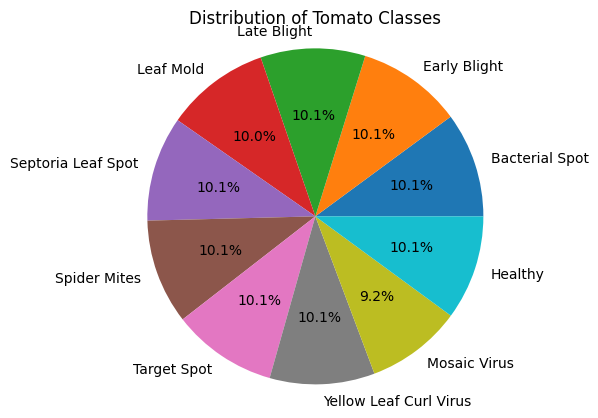

In [ ]:
import matplotlib.pyplot as plt
labels = class_counts.keys()
sizes = class_counts.values()
import matplotlib.pyplot as plt

class_counts = {'Bacterial Spot': 1000, 'Early Blight': 999, 
                'Late Blight': 997, 'Leaf Mold': 992,
                'Septoria Leaf Spot':1000, 'Spider Mites':1000,
                'Target Spot':1000, 'Yellow Leaf Curl Virus':1000,
                'Mosaic Virus':912, 'Healthy':996}

labels = list(class_counts.keys())
sizes = list(class_counts.values())

plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.axis('equal')
plt.title("Distribution of Tomato Classes")
plt.show()


# Preliminary Models
## Model With No Transfer Learning

In [ ]:
def plot_learning_curve(history):
  plt.plot(history.history['accuracy'])
  plt.plot(history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

  plt.plot(history.history['loss'])
  plt.plot(history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train', 'valid'], loc='upper left')
  plt.show()

In [ ]:
#model built from scratch 
import tensorflow as tf 
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D
from keras import Sequential
from keras.optimizers import Adam

import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224,224,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 186624)            0         
                                                                 
 dense (Dense)               (None, 10)                1

In [ ]:
history = model.fit(train_generator, 
                      validation_data=val_generator, 
                      epochs=5)

Epoch 1/5
310/310 [==============================] - 137s 406ms/step - loss: 27.0918 - accuracy: 0.2016 - val_loss: 2.0658 - val_accuracy: 0.2500
Epoch 2/5
310/310 [==============================] - 123s 396ms/step - loss: 2.1461 - accuracy: 0.2212 - val_loss: 2.1981 - val_accuracy: 0.1833
Epoch 3/5
310/310 [==============================] - 144s 464ms/step - loss: 2.2091 - accuracy: 0.1807 - val_loss: 2.2121 - val_accuracy: 0.1917
Epoch 4/5
310/310 [==============================] - 129s 416ms/step - loss: 2.1908 - accuracy: 0.1898 - val_loss: 2.1719 - val_accuracy: 0.1958
Epoch 5/5
310/310 [==============================] - 138s 446ms/step - loss: 2.1816 - accuracy: 0.2051 - val_loss: 2.2590 - val_accuracy: 0.2146


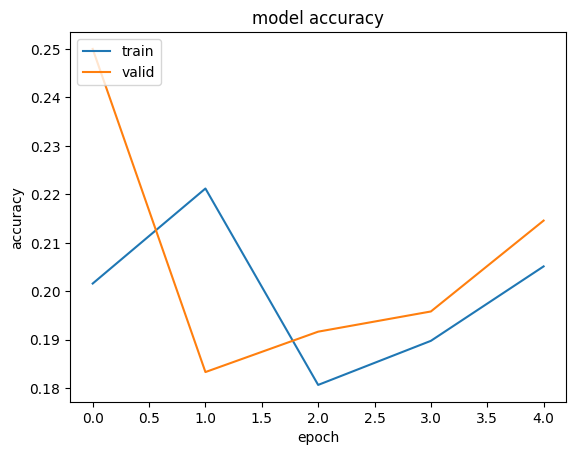

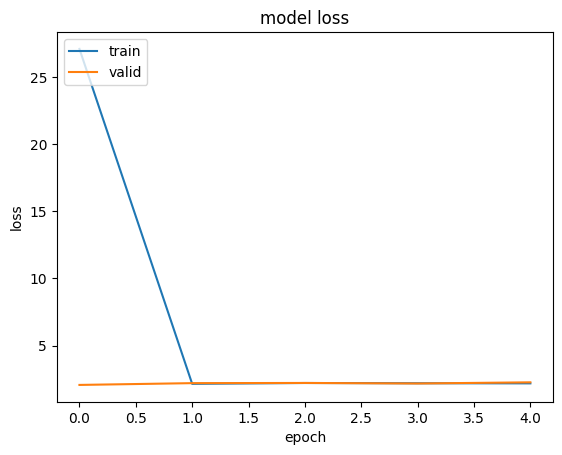

In [ ]:
plot_learning_curve(history) 

## Xception Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.xception import Xception

base_model = Xception(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

for layer in base_model.layers:
    layer.trainable = False

model = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 xception (Functional)       (None, 7, 7, 2048)        20861480  
                                                                 
 global_average_pooling2d_1   (None, 2048)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_3 (Dense)             (None, 1024)              2098176   
                                                                 
 dropout_1 (Dropout)         (None, 1024)              0         
                                                                 
 dense_4 (Dense)             (None, 10)                10250     
                                                                 
Total params: 22,969,906
Trainable params: 2,108,426
Non-trainable params: 20,861,480
__________________________________

In [ ]:
history = model.fit(train_generator, 
                      validation_data=val_generator, 
                      epochs=10)

Epoch 1/10
310/310 [==============================] - 148s 455ms/step - loss: 3.5885 - accuracy: 0.3487 - val_loss: 1.6282 - val_accuracy: 0.4667
Epoch 2/10
310/310 [==============================] - 134s 430ms/step - loss: 1.6324 - accuracy: 0.4193 - val_loss: 1.4058 - val_accuracy: 0.5188
Epoch 3/10
310/310 [==============================] - 142s 458ms/step - loss: 1.5586 - accuracy: 0.4442 - val_loss: 1.5844 - val_accuracy: 0.4771
Epoch 4/10
310/310 [==============================] - 135s 434ms/step - loss: 1.5070 - accuracy: 0.4577 - val_loss: 1.5007 - val_accuracy: 0.4875
Epoch 5/10
310/310 [==============================] - 136s 438ms/step - loss: 1.4641 - accuracy: 0.4695 - val_loss: 1.3236 - val_accuracy: 0.5250
Epoch 6/10
310/310 [==============================] - 138s 443ms/step - loss: 1.4397 - accuracy: 0.4812 - val_loss: 1.3219 - val_accuracy: 0.5688
Epoch 7/10
310/310 [==============================] - 135s 435ms/step - loss: 1.4766 - accuracy: 0.4705 - val_loss: 1.4679 -

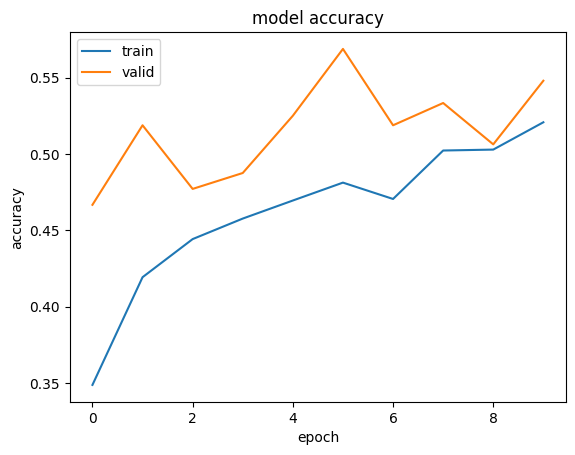

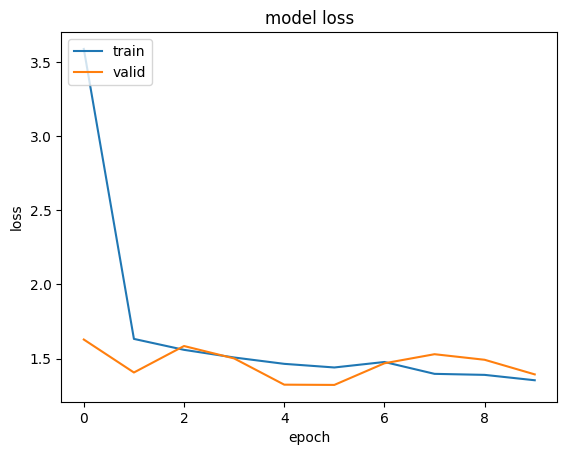

In [ ]:
plot_learning_curve(history)

## Mobilenet Transfer Learning

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.applications.mobilenet import MobileNet

base_model = MobileNet(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

model3 = keras.Sequential([
    base_model,
    keras.layers.GlobalAveragePooling2D(),
    keras.layers.Dense(1024, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

for layer in base_model.layers:
    layer.trainable = False

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model3.summary()


17225924/17225924 [==============================] - 1s 0us/step
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_224 (Functio  (None, 7, 7, 1024)       3228864   
 nal)                                                            
                                                                 
 global_average_pooling2d_2   (None, 1024)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_5 (Dense)             (None, 1024)              1049600   
                                                                 
 dropout_2 (Dropout)         (None, 1024)              0         
                                                                 
 dense_6 (Dense)             (None, 10)                10250     
                                                       

In [ ]:
history3 = model3.fit(train_generator, 
                      validation_data=val_generator, 
                      epochs=10)

Epoch 1/10
310/310 [==============================] - 128s 411ms/step - loss: 0.8416 - accuracy: 0.7127 - val_loss: 0.8562 - val_accuracy: 0.7021
Epoch 2/10
310/310 [==============================] - 123s 397ms/step - loss: 0.7792 - accuracy: 0.7329 - val_loss: 0.6969 - val_accuracy: 0.7667
Epoch 3/10
310/310 [==============================] - 123s 397ms/step - loss: 0.7129 - accuracy: 0.7503 - val_loss: 0.8257 - val_accuracy: 0.6979
Epoch 4/10
310/310 [==============================] - 124s 399ms/step - loss: 0.6751 - accuracy: 0.7688 - val_loss: 0.6602 - val_accuracy: 0.7750
Epoch 5/10
310/310 [==============================] - 124s 399ms/step - loss: 0.6492 - accuracy: 0.7794 - val_loss: 0.7023 - val_accuracy: 0.7604
Epoch 6/10
310/310 [==============================] - 124s 400ms/step - loss: 0.6270 - accuracy: 0.7819 - val_loss: 0.7015 - val_accuracy: 0.7521
Epoch 7/10
310/310 [==============================] - 124s 400ms/step - loss: 0.6051 - accuracy: 0.7914 - val_loss: 0.6717 -

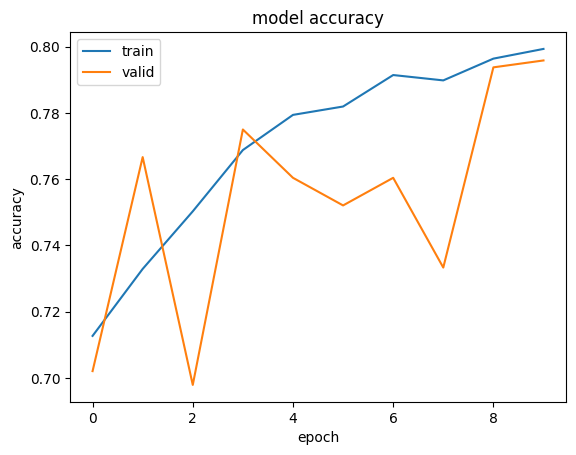

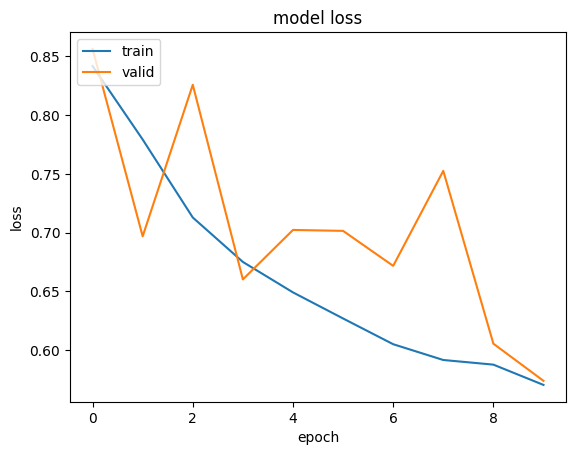

In [ ]:
plot_learning_curve(history3)

# Final Model - EfficientNetB4

In [ ]:
#EFFICIENTNETB4 - FINAL MODEL
import tensorflow as tf 
from keras.layers import Dense, Dropout, BatchNormalization, Flatten, MaxPooling2D
from keras import Sequential
from keras import regularizers
from keras.applications.efficientnet import EfficientNetB4
from keras.optimizers import Adam

base_model = EfficientNetB4(weights = "imagenet",include_top = False, input_shape = (224,224,3), pooling = "max")

for layer in base_model.layers:    
  layer.trainable = True

model5 = Sequential()
model5.add(base_model)
model5.add(Flatten())
model5.add(BatchNormalization())
model5.add(Dense(256, activation = "relu", kernel_regularizer=regularizers.l2(0.01)))
model5.add(Dropout(0.5))
model5.add(Dense(10, activation = "softmax"))


model5.compile(Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy']) 

71686520/71686520 [==============================] - 3s 0us/step


In [ ]:
model5.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional)  (None, 1792)             17673823  
                                                                 
 flatten (Flatten)           (None, 1792)              0         
                                                                 
 batch_normalization (BatchN  (None, 1792)             7168      
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 256)               459008    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                        

In [ ]:
from keras.callbacks import EarlyStopping

earlystop = EarlyStopping(monitor='val_accuracy', patience=5, verbose=1)

history5 = model5.fit(train_generator, 
                      validation_data=val_generator, 
                      epochs=15,  
                      callbacks=[earlystop])

Epoch 1/15
310/310 [==============================] - 250s 714ms/step - loss: 3.2994 - accuracy: 0.8303 - val_loss: 1.6540 - val_accuracy: 0.8604
Epoch 2/15
310/310 [==============================] - 218s 703ms/step - loss: 0.8392 - accuracy: 0.9280 - val_loss: 0.5453 - val_accuracy: 0.9396
Epoch 3/15
310/310 [==============================] - 230s 742ms/step - loss: 0.3162 - accuracy: 0.9608 - val_loss: 0.4335 - val_accuracy: 0.9271
Epoch 4/15
310/310 [==============================] - 218s 703ms/step - loss: 0.2468 - accuracy: 0.9643 - val_loss: 0.2691 - val_accuracy: 0.9604
Epoch 5/15
310/310 [==============================] - 220s 709ms/step - loss: 0.2642 - accuracy: 0.9656 - val_loss: 0.3910 - val_accuracy: 0.9229
Epoch 6/15
310/310 [==============================] - 218s 701ms/step - loss: 0.3115 - accuracy: 0.9610 - val_loss: 0.9722 - val_accuracy: 0.8938
Epoch 7/15
310/310 [==============================] - 217s 700ms/step - loss: 0.2526 - accuracy: 0.9687 - val_loss: 0.2204 -

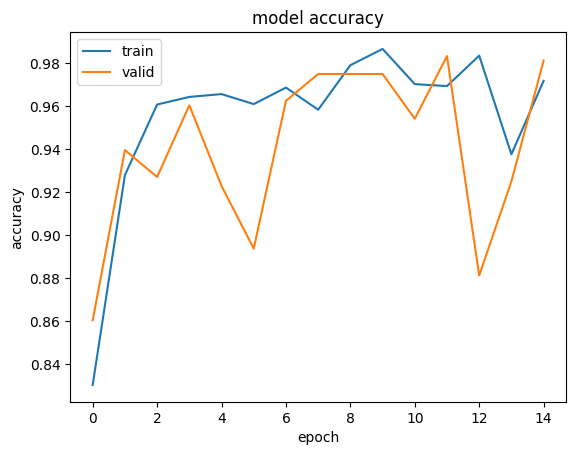

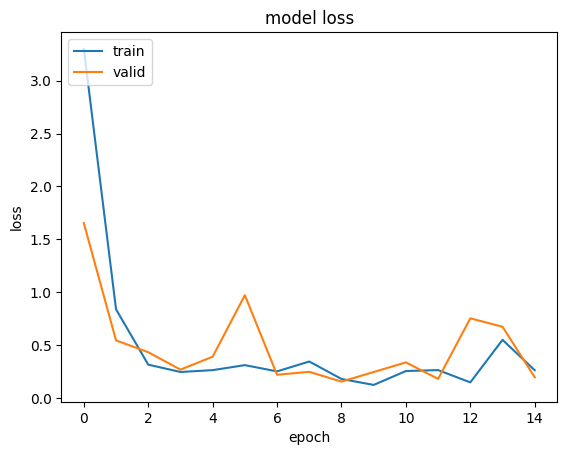

In [ ]:
import matplotlib.pyplot as plt
plot_learning_curve(history5)

In [ ]:
test_loss, test_acc = model5.evaluate(test_generator)
print('Test accuracy:', test_acc)
print("Test loss:", test_loss)

15/15 [==============================] - 3s 220ms/step - loss: 0.1862 - accuracy: 0.9790
Test accuracy: 0.9790356159210205
Test loss: 0.1861913949251175


In [ ]:
from prettytable import PrettyTable
from sklearn.metrics import classification_report
import numpy as np
test_generator.reset()
test_pred_t = model5.predict(test_generator, steps=test_generator.n//test_generator.batch_size + 1, verbose=1) 
y_true = test_generator.classes
y_pred = np.argmax(test_pred_t, axis=1)
class_names = list(test_generator.class_indices.keys())
report = classification_report(y_true, y_pred, target_names=class_names, output_dict=True)
table = PrettyTable()
table.field_names = ['Class'] + list(report[class_names[0]].keys())
for class_name in class_names:
    row = [class_name]
    for metric, value in report[class_name].items():
        if metric == 'support':
            row.append(int(value))
        else:
            row.append(f'{value:.2f}')
    table.add_row(row)
print(table.get_string(title="Classification Report", border=True, header=True, padding_width=1, title_style='red'))


15/15 [==============================] - 5s 142ms/step
+-----------------------------------------------+-----------+--------+----------+---------+
|                     Class                     | precision | recall | f1-score | support |
+-----------------------------------------------+-----------+--------+----------+---------+
|            Tomato___Bacterial_spot            |    1.00   |  1.00  |   1.00   |    50   |
|             Tomato___Early_blight             |    0.98   |  0.96  |   0.97   |    46   |
|              Tomato___Late_blight             |    0.98   |  0.98  |   0.98   |    50   |
|               Tomato___Leaf_Mold              |    1.00   |  0.98  |   0.99   |    47   |
|          Tomato___Septoria_leaf_spot          |    0.92   |  1.00  |   0.96   |    49   |
| Tomato___Spider_mites Two-spotted_spider_mite |    1.00   |  0.88  |   0.93   |    49   |
|              Tomato___Target_Spot             |    0.96   |  1.00  |   0.98   |    50   |
|     Tomato___Tomato_Yel

# LIME Explanation

In [ ]:
!pip install lime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283859 sha256=7ab025016a07f07e648a859360ac84bff9a86cb3420bbcadc9fa08385899e892
  Stored in directory: /root/.cache/pip/wheels/ed/d7/c9/5a0130d06d6310bc6cbe55220e6e72dcb8c4eff9a478717066
Successfully built lime


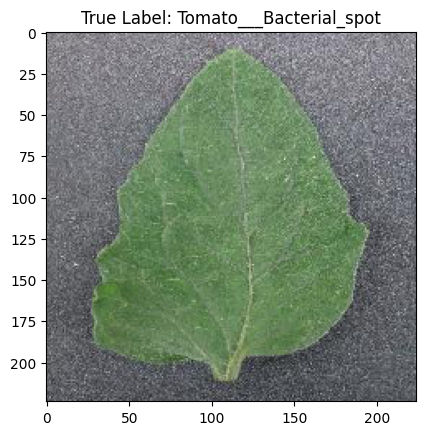

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 49ms/step


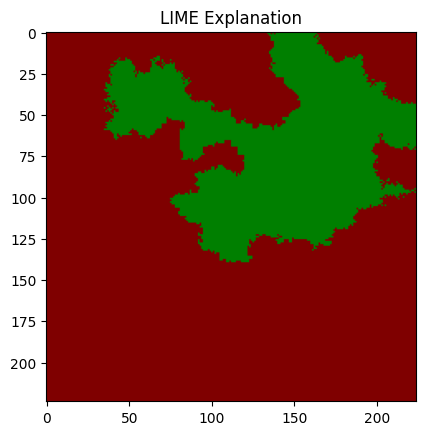

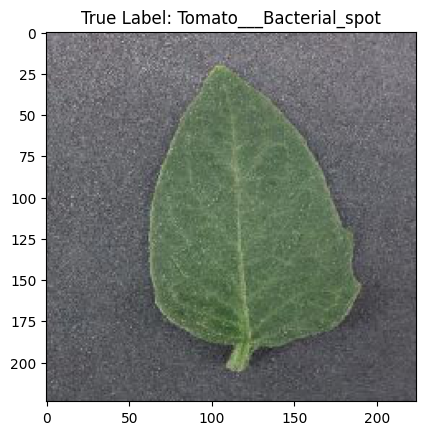

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


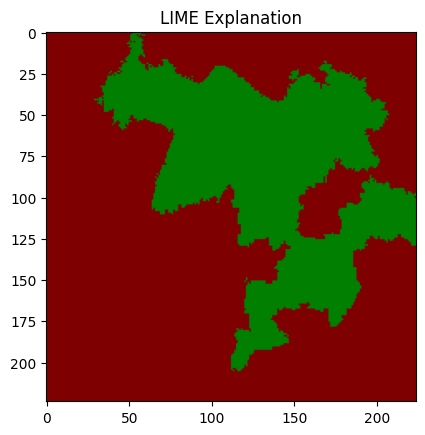

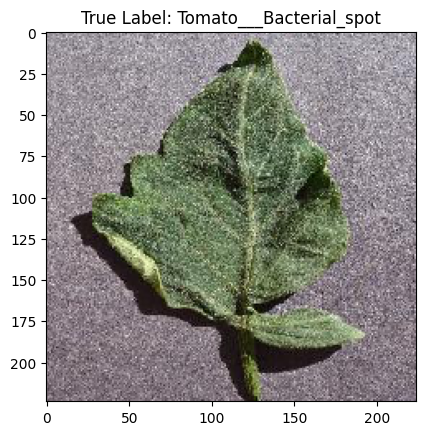

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 37ms/step


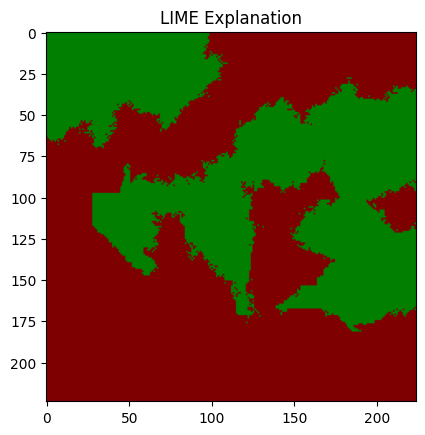

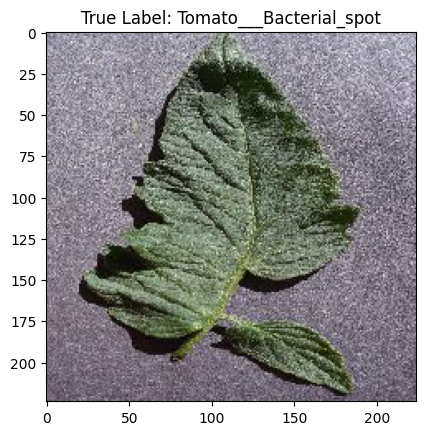

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 34ms/step


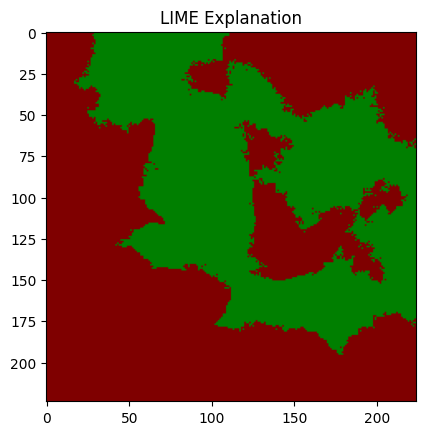

In [ ]:
import numpy as np
from lime import lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

predict_fn = lambda x: model5.predict(x)

# Invert the class indices dictionary to get the class names as keys
class_names = {v: k for k, v in test_generator.class_indices.items()}

num_images = 4 
sample_images, sample_labels = test_generator.next()

for i in range(num_images):
    image = sample_images[i]
    true_label = test_generator.classes[i]

    image = image.astype('float32')
    image /= 255.0  # Normalize pixel values to the range [0, 1]
    plt.imshow(image)
    plt.title(f'True Label: {class_names[true_label]}')
    plt.show()

    explainer = lime_image.LimeImageExplainer()

    explanation = explainer.explain_instance(
        image, 
        predict_fn, 
        top_labels=5, 
        hide_color=0, 
        num_samples=1000
    )

    temp, mask = explanation.get_image_and_mask(
        explanation.top_labels[0], 
        positive_only=True, 
        num_features=10, 
        hide_rest=False
    )

    color1 = (1, 0, 0)  # Red
    color2 = (0, 1, 0)  # Green
    alpha = 0.5  # Transparency
    masked_image = np.zeros_like(image)
    for c in range(3):
        masked_image[:,:,c] = np.where(mask==0, image[:,:,c]*(1-alpha)+alpha*color1[c]*255, image[:,:,c]*(1-alpha)+alpha*color2[c]*255)
    plt.imshow(masked_image.astype(np.uint8))
    plt.title('LIME Explanation')
    plt.show()
